# Programming Analytics Final Project

In [1]:
import sys
import warnings 
warnings.filterwarnings('ignore')
import plotly.express as px
import vaers

In [2]:
from numba import jit

Loading the files

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
vaers_symptoms = vaers.create_dataframe('2021VAERSSYMPTOMS.csv')

In [5]:
vaers_vax = vaers.create_dataframe('2021VAERSVAX.csv')

In [6]:
vaers_data = vaers.create_dataframe('2021VAERSData.csv')

In [7]:
a = vaers_symptoms.merge(vaers_vax, on = 'VAERS_ID', how = 'left')

In [8]:
whole_data = a.merge(vaers_data, on='VAERS_ID', how='left')

In [9]:
whole_data.shape

(57563, 52)

## Hypothesis 1

In [45]:
vaers_vax_v1 = vaers_vax[vaers_vax['VAX_TYPE'] == 'COVID19']
vax_dict = {'MODERNA': 'Moderna', 'PFIZER\BIONTECH': 'Pfizer'}
vaers_vax_v2 = vaers_vax_v1.replace({"VAX_MANU": vax_dict})
vaers_vax_v3 = vaers_vax_v2[['VAERS_ID', 'VAX_TYPE', 'VAX_MANU']]
vaers_data_vax = vaers_data.merge(vaers_vax_v3, on="VAERS_ID", how="left")
vaers_data_vax_v1 = vaers.drop_null_values(vaers_data_vax, subset='AGE_YRS')
vaers_data_vax_v2 = vaers_data_vax_v1[['VAERS_ID', 'VAX_MANU']]
vaers_data_vax_v3 = vaers.replace_garbage_values_with_nan(vaers_data_vax)

In [46]:
state_data = vaers.create_dataframe("vaccine_data_us_timeline.csv")
state_data_v1 = state_data[state_data['Date'] > "2021-01-01"]
state_data_v2 = vaers.state_abbreviations(state_data)

In [47]:
fig = px.histogram(vaers_data_vax_v2, x="VAX_MANU", width=650,
                       title="Vaccines Administered vs Reported Adverse Effects", barmode="overlay")
fig.update_xaxes(categoryorder="total descending", title_text="Vaccine Manufacturer")
fig1 = px.bar(state_data_v2, x="Vaccine_Type", y="Doses_admin", width=650,
                  title="Total Number of Vaccines", barmode="overlay", color="Vaccine_Type")
fig.add_trace(fig1.data[0])
fig.add_trace(fig1.data[1])
fig.add_trace(fig1.data[2])
fig.show()

## Hypothesis 2

## Hypothesis 3

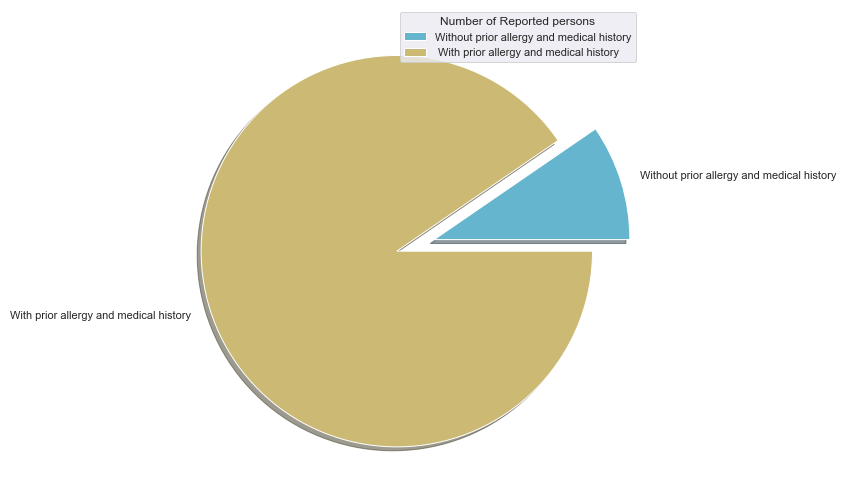

In [14]:
vaers_data_vax_v3 = vaers.replace_garbage_values_with_nan(vaers_data_vax)
output = vaers.hypothesis_validation(vaers_data_vax_v3)
vaers.hypothesis_2_visualization(output)

## Hypothesis 4

In [15]:
vaers_symptoms_vax = vaers_symptoms.merge(vaers_vax, on='VAERS_ID', how='left')
whole_dataset = vaers_symptoms_vax.merge(vaers_data, on='VAERS_ID', how='left')

In [16]:
relevant_data = whole_dataset.filter(['VAX_NAME', 'VAX_DATE', 'ONSET_DATE'])

In [17]:
relevant_data['ONSET_DATE'] = pd.to_datetime(relevant_data['ONSET_DATE'])

In [18]:
relevant_data['VAX_DATE'] = pd.to_datetime(relevant_data['VAX_DATE'])

In [19]:
relevant_data['Days'] = (relevant_data['ONSET_DATE'] - relevant_data['VAX_DATE'])

In [20]:
moderna = relevant_data.loc[relevant_data['VAX_NAME'] == 'COVID19 (COVID19 (MODERNA))']
moderna_v1 = moderna[moderna.Days.notnull()]

Imported time_to_int from .py file

In [21]:
moderna_v1['Days'] = moderna_v1['Days'].apply(vaers.time_to_int)

In [22]:
moderna_v1['Days'] =  moderna_v1.loc[moderna_v1['Days']>=0, 'Days']

imported avg_onset from .py file


In [23]:
moderna_onset = vaers.avg_onset(moderna_v1)

In [24]:
vacc_date = '2020-1-1'
moderna_after_2020 = moderna_v1['VAX_DATE'] >= vacc_date
filtered_dates = moderna_v1.loc[moderna_after_2020]
filtered_dates['Days'] = filtered_dates.loc[filtered_dates['Days']>=0, 'Days']

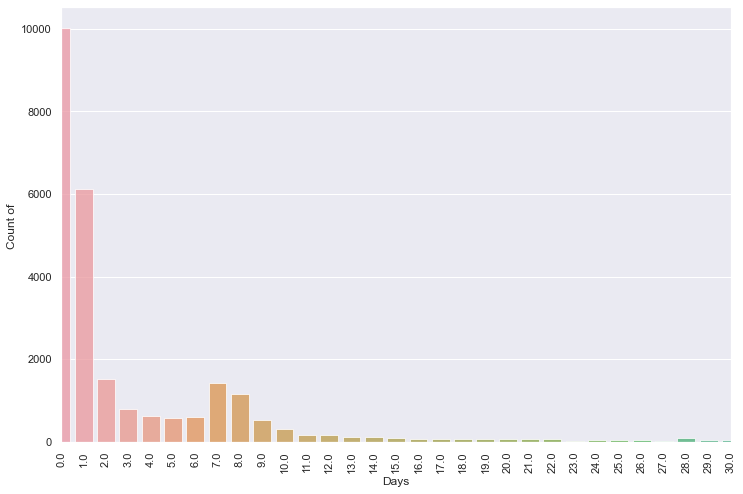

In [25]:
import seaborn as sns
Z = filtered_dates['Days'].value_counts()
plt.figure(figsize = (12,8))
sns.barplot(Z.index, Z.values, alpha = 0.75)
plt.xlim(0,30)
plt.ylabel('Count of ')
plt.xlabel('Days')
plt.xticks(rotation = 'vertical')
plt.show()

In [26]:
pfizer = relevant_data.loc[relevant_data['VAX_NAME'] == 'COVID19 (COVID19 (PFIZER-BIONTECH))']
pfizer_v1 = pfizer[pfizer.Days.notnull()]

In [27]:
pfizer_v1['Days'] = pfizer_v1['Days'].apply(vaers.time_to_int)

In [28]:
pfizer_v1['Days'] =  pfizer_v1.loc[pfizer_v1['Days']>=0, 'Days']

In [29]:
pfizer_onset = vaers.avg_onset(pfizer_v1)

In [30]:
pfizer_after_2020 = pfizer_v1['VAX_DATE'] >= vacc_date
filtered_dates_p = pfizer_v1.loc[pfizer_after_2020]
filtered_dates_p['Days'] = filtered_dates_p.loc[filtered_dates_p['Days']>=0, 'Days']

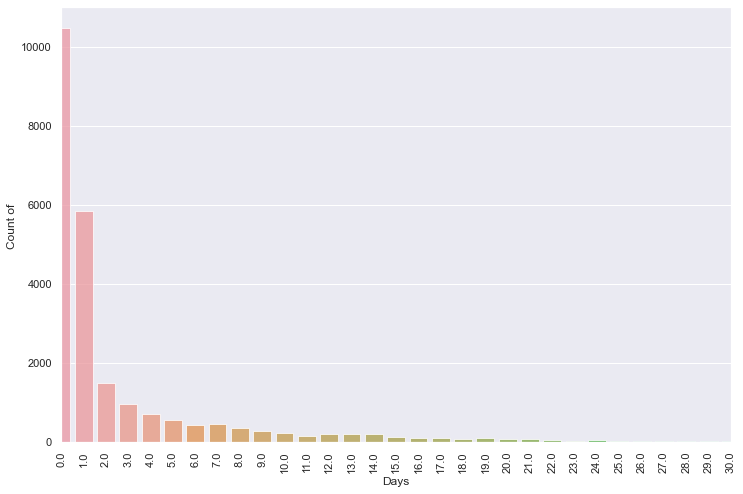

In [31]:
Y = filtered_dates_p['Days'].value_counts()
plt.figure(figsize = (12,8))
sns.barplot(Y.index, Y.values, alpha = 0.75)
plt.xlim(0,30)
plt.ylabel('Count of ')
plt.xlabel('Days')
plt.xticks(rotation = 'vertical')
plt.show()

In [32]:
janssen = relevant_data.loc[relevant_data['VAX_NAME'] == 'COVID19 (COVID19 (JANSSEN))']
janssen_v1 = janssen[janssen.Days.notnull()]

In [33]:
janssen_v1['Days'] = janssen_v1['Days'].apply(vaers.time_to_int)

In [34]:
janssen_v1['Days'] =  janssen_v1.loc[janssen_v1['Days']>=0, 'Days']

In [35]:
janssen_onset = vaers.avg_onset(janssen_v1)

In [36]:
janssen_after_2020 = janssen_v1['VAX_DATE'] >= vacc_date
filtered_dates_j = janssen_v1.loc[janssen_after_2020]
filtered_dates_j['Days'] = filtered_dates_j.loc[filtered_dates_j['Days']>=0, 'Days']

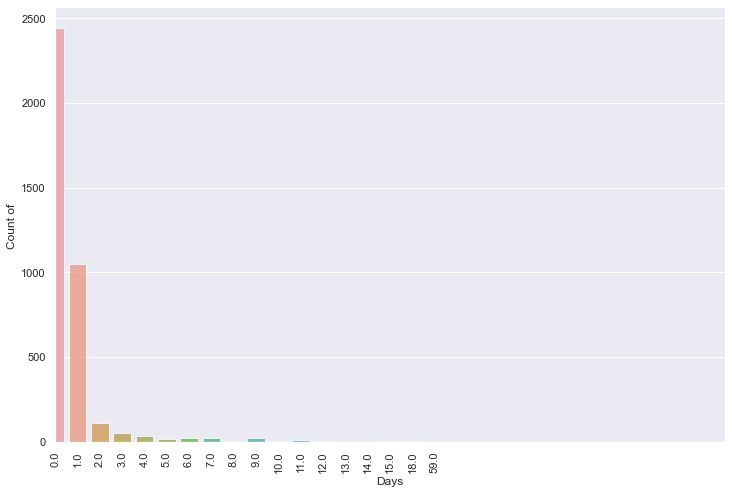

In [37]:
X = filtered_dates_j['Days'].value_counts()
plt.figure(figsize = (12,8))
sns.barplot(X.index, X.values, alpha = 0.75)
plt.xlim(0,30)
plt.ylabel('Count of ')
plt.xlabel('Days')
plt.xticks(rotation = 'vertical')
plt.show()

In [38]:
vaers_vax_v1 = vaers_vax[vaers_vax['VAX_TYPE'] == 'COVID19']
vaers_vax_v2 = vaers_vax_v1[['VAERS_ID', 'VAX_TYPE', 'VAX_MANU']]

In [39]:
vaer_symptoms_vax = vaers_symptoms.merge(vaers_vax_v2, on="VAERS_ID", how="left")

In [40]:
vaer_symptoms_moderna = vaer_symptoms_vax[vaer_symptoms_vax['VAX_MANU']=='MODERNA']

In [41]:
import plotly.express as px
fig = px.histogram(vaer_symptoms_moderna, x="SYMPTOM1", width=650,color_discrete_sequence=px.colors.diverging.Spectral[4::-2],
                       title="Count of Different types of vaccines administered for Moderna" )
fig.update_xaxes(categoryorder="total descending", title_text="Symptom Types")
fig.show()

In [42]:
vaer_symptoms_pfizer = vaer_symptoms_vax[vaer_symptoms_vax['VAX_MANU']=='PFIZER\BIONTECH']

fig = px.histogram(vaer_symptoms_pfizer, x="SYMPTOM1", width=650,color_discrete_sequence=px.colors.diverging.Spectral[-4::-3],
                       title="Count of Different types of vaccines administered for Pfizer")
fig.update_xaxes(categoryorder="total descending", title_text="Symptom Types")
fig.show()

In [43]:
vaer_symptoms_jannsen = vaer_symptoms_vax[vaer_symptoms_vax['VAX_MANU']=='JANSSEN']

In [44]:
fig = px.histogram(vaer_symptoms_jannsen, x="SYMPTOM1", width=650, color_discrete_sequence=px.colors.diverging.Spectral[3::1],
                       title="Count of Different types of vaccines administered for Johnson & Johnson")
fig.update_xaxes(categoryorder="total descending", title_text="Symptom Types")
fig.show()

## Hypothesis 5


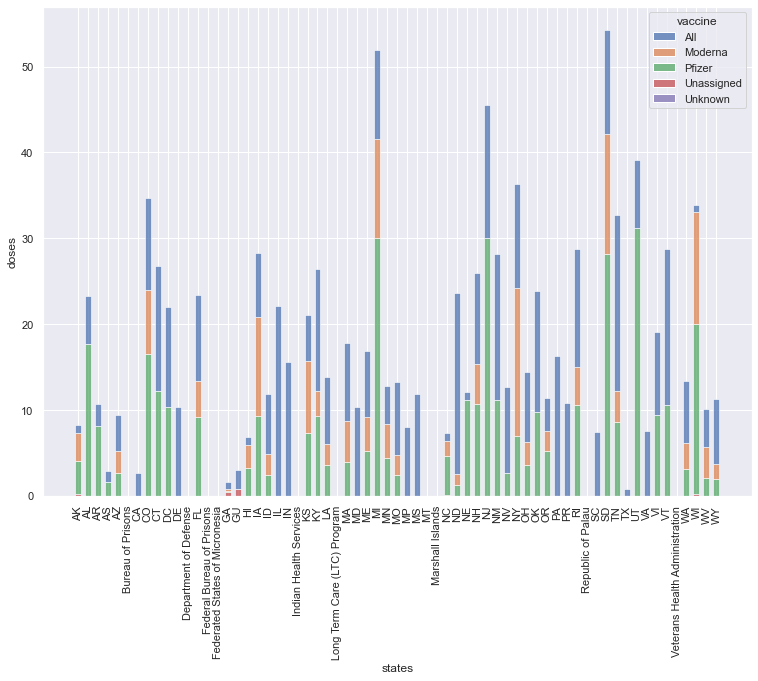

In [13]:
vaers.statewise_analysis(state_data_v2)